In [4]:
import pandas as pd

In [5]:
df= pd.read_csv("Titanic_Dataset_after_prepocessing.csv", index_col="Unnamed: 0")

In [6]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,FarePerPerson,AgeGroup
0,0,3,0,0.0,0,0,-0.498407,1,1,7.829200,3
1,0,2,0,3.0,0,0,-0.465089,1,1,9.687500,5
2,0,3,0,-0.0,0,0,-0.483466,2,1,8.662500,3
3,0,3,0,-1.0,0,0,-0.473381,2,1,9.225000,2
4,0,2,0,-0.0,1,1,-0.118823,2,3,9.666667,3
...,...,...,...,...,...,...,...,...,...,...,...
527,1,1,1,2.0,1,4,4.076705,2,6,43.833333,4
528,1,2,1,-1.0,2,1,-0.226401,2,4,5.750000,3
529,1,1,1,0.0,0,0,3.153331,0,1,211.500000,3
530,1,2,1,-2.0,1,2,-0.141235,2,4,6.937500,1


In [7]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'FarePerPerson', 'AgeGroup'],
      dtype='object')

# Building and Evaluating a Machine Learning Model

## Support Vector Machine

Importing libraries

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

Spliting the data into two categories, x with without the survival which is to be predicted and Y with column survival

In [9]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In this case, test_size=0.2 means that 20% of the dataset will be used as the test set, and the remaining 80% will be used as the training set.

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

Training the model on linear svm

In [32]:
model_linear = SVC(kernel='linear')

In [33]:
model_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [38]:
y_pred_linear=model_linear.predict(X_test_scaled)

In [40]:
accuracy_score_linear=accuracy_score(y_test, y_pred_linear)

In [41]:
print(f'Accuracy: {accuracy_score_linear}')

Accuracy: 1.0


In [42]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        48

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



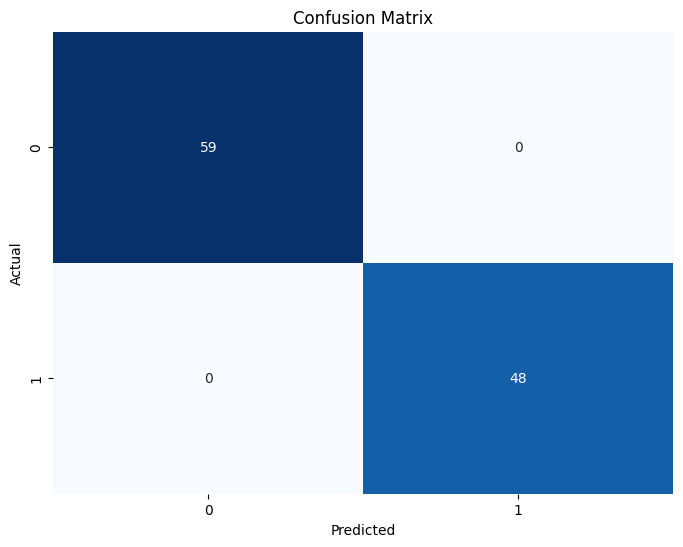

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Applying non-linear SVM

In [45]:
model_rbf = SVC(kernel='rbf')

In [46]:
model_rbf.fit(X_train_scaled, y_train)

SVC()

In [47]:
y_pred_rbf=model_rbf.predict(X_test_scaled)

In [48]:
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy:", accuracy_rbf)

Accuracy: 0.9813084112149533


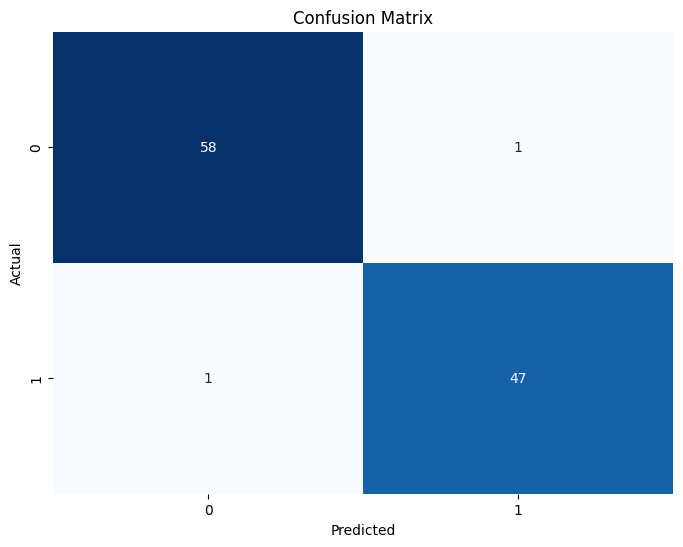

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Model

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

n_estimators: This parameter specifies the number of trees in the forest.

In [51]:
model_RFM=RandomForestClassifier(n_estimators=100, random_state=42)

Training the model

In [52]:
model_RFM.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_pred_RFM=model_RFM.predict(X_test_scaled)

In [54]:
accuracy_RFM=accuracy_score(y_test, y_pred_RFM)

In [55]:
print(f'Accuracy: {accuracy_RFM}')

Accuracy: 1.0


In [57]:
classification_rep = classification_report(y_test, y_pred_RFM)

print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        48

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

